In [8]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [22]:
def integrate_trapezoidal(x, y):
    return (((y[1:] + y[:-1]) / 2) * (x[1:] - x[:-1])).sum()

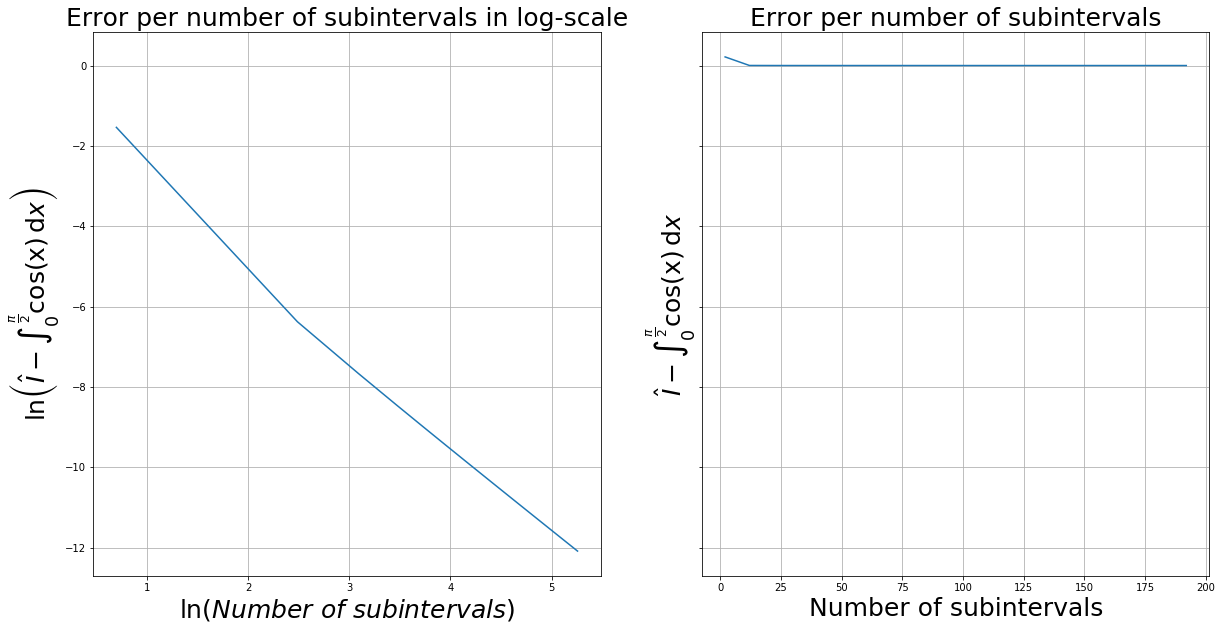

In [76]:
"""осцилирующая функция cos(x) от 0 до pi/2"""
# cosx = lambda x: np.cos(x)
# cosx_scipy = integrate.quad(sinx, 0, np.pi / 2)[0]
cosx_exact = 1 # просто посчитали на бумажке:)
N_ = list(range(2, 200, 10))
N_results = []
for N in N_:
    x = np.linspace(0, np.pi / 2, N)
    y = np.cos(x)
    res = integrate_trapezoidal(x, y)
    # print(res)
    N_results.append(np.abs(cosx_exact - res))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
#ax = f.add_subplot(1,1,1)
N_log = np.log(N_)
N_results_log = np.log(N_results)
ax1.set_title('Error per number of subintervals in log-scale', fontsize=25)
ax1.set_xlabel(r'$\ln(Number \ of \ subintervals)$', fontsize=25)
ax1.set_ylabel(r'$\ln\left(\hat{I} - \int_0^{\frac{\pi}{2}} \mathrm{\cos (x)}\,\mathrm{d}x\right)$', fontsize=25)
ax1.plot(N_log, N_results_log, label='log-scale')
#ax.plot(N_, N_results, label='default')
ax1.grid()
ax2.set_title('Error per number of subintervals', fontsize=25)
ax2.set_xlabel('Number of subintervals', fontsize=25)
ax2.set_ylabel(r'$\hat{I} - \int_0^{\frac{\pi}{2}} \mathrm{\cos (x)}\,\mathrm{d}x$', fontsize=25)
ax2.plot(N_, N_results, label='log-scale')
#ax.plot(N_, N_results, label='default')
ax2.grid()

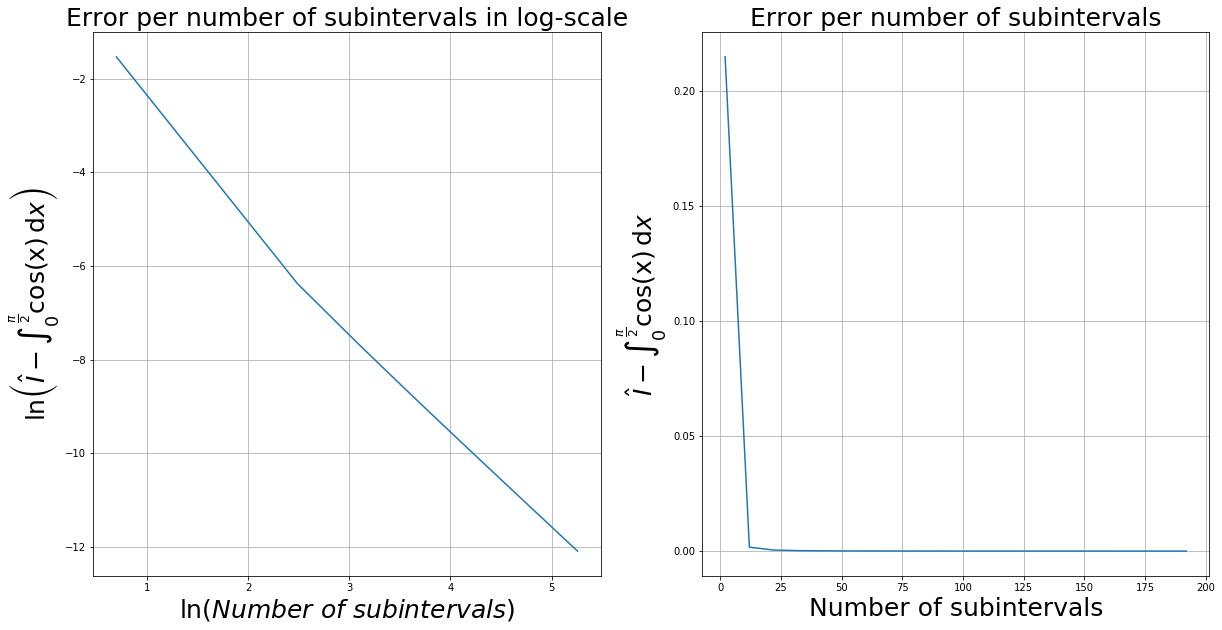

In [77]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
#ax = f.add_subplot(1,1,1)
ax1.set_title('Error per number of subintervals in log-scale', fontsize=25)
ax1.set_xlabel(r'$\ln(Number \ of \ subintervals)$', fontsize=25)
ax1.set_ylabel(r'$\ln\left(\hat{I} - \int_0^{\frac{\pi}{2}} \mathrm{\cos (x)}\,\mathrm{d}x\right)$', fontsize=25)
# N_log = np.log(N_)
# N_results_log = np.log(N_results)
ax1.plot(N_log, N_results_log, label='log-scale')
#ax.plot(N_, N_results, label='default')
ax1.grid()
ax2.set_title('Error per number of subintervals', fontsize=25)
ax2.set_xlabel('Number of subintervals', fontsize=25)
ax2.set_ylabel(r'$\hat{I} - \int_0^{\frac{\pi}{2}} \mathrm{\cos (x)}\,\mathrm{d}x$', fontsize=25)
ax2.plot(N_, N_results, label='log-scale')
#ax.plot(N_, N_results, label='default')
ax2.grid()

In [79]:
k = (N_results_log[-1] - N_results_log[0]) / (N_log[-1] - N_log[0])
c = N_results_log[0] - k * N_log[0]
print(k, np.exp(c))

-2.310804442394493 1.0647677428091877


$$\text{Error} \approx 1.06 N^{-2.31}$$
Это согласуется с оценкой погрешности для формулы трапеций:  
$$R = O\left(n^{-2}\right)$$

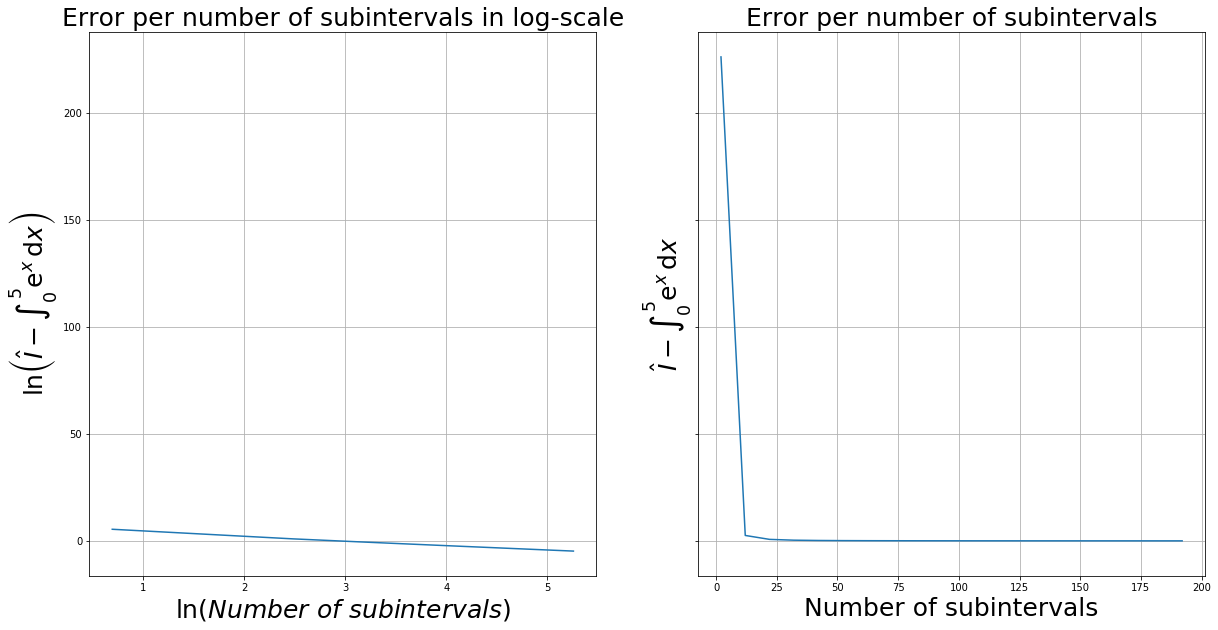

In [71]:
"""гладкая функция exp(x) от 0 до 5"""
exp = lambda x: np.exp(x)
exp_scipy = integrate.quad(exp, 0, 5)[0]
N_results = []
for N in N_:
    x = np.linspace(0, 5, N)
    y = np.exp(x)
    res = integrate_trapezoidal(x, y)
    # print(res)
    N_results.append(np.abs(exp_scipy - res))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
ax1.set_title('Error per number of subintervals in log-scale', fontsize=25)
ax1.set_xlabel(r'$\ln\left(Number \ of \ subintervals\right)$', fontsize=25)
ax1.set_ylabel(r'$\ln\left(\hat{I} - \int_0^5 \mathrm{e}^{x}\,\mathrm{d}x\right)$', fontsize=25)
ax1.plot(np.log(N_), np.log(N_results))
ax1.grid()
ax2.set_title('Error per number of subintervals', fontsize=25)
ax2.set_xlabel('Number of subintervals', fontsize=25)
ax2.set_ylabel(r'$\hat{I} - \int_0^5 \mathrm{e}^{x}\,\mathrm{d}x$', fontsize=25)
ax2.plot(N_, N_results)
ax2.grid()

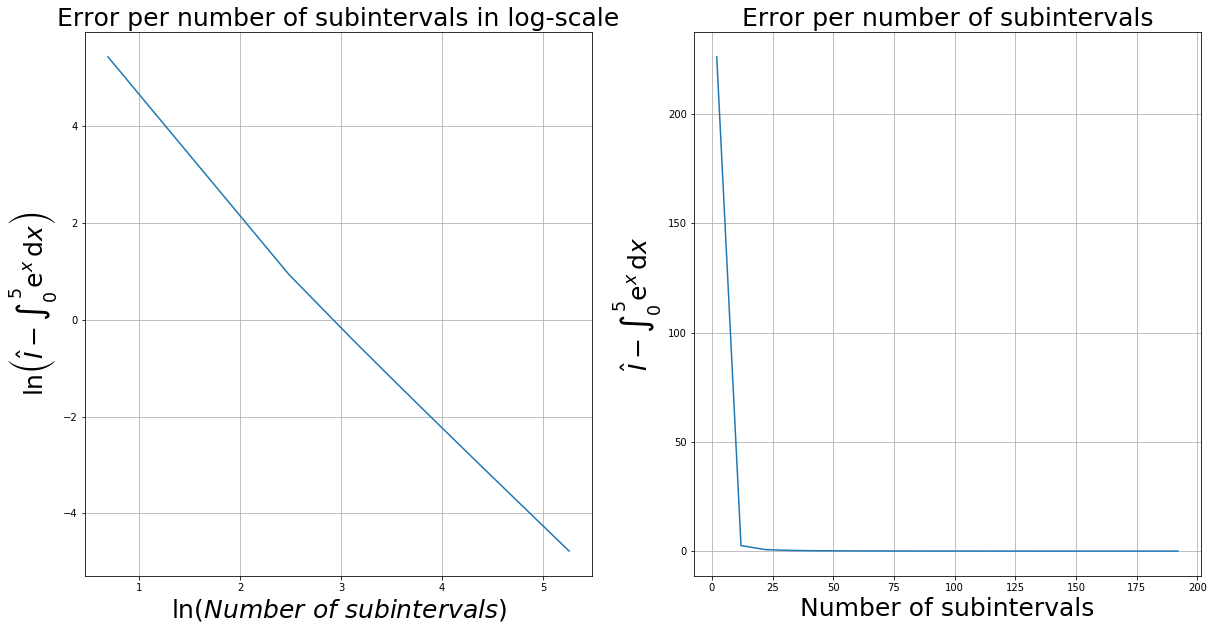

In [72]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Error per number of subintervals in log-scale', fontsize=25)
ax1.set_xlabel(r'$\ln\left(Number \ of \ subintervals\right)$', fontsize=25)
ax1.set_ylabel(r'$\ln\left(\hat{I} - \int_0^5 \mathrm{e}^{x}\,\mathrm{d}x\right)$', fontsize=25)
ax1.plot(np.log(N_), np.log(N_results))
ax1.grid()
ax2.set_title('Error per number of subintervals', fontsize=25)
ax2.set_xlabel('Number of subintervals', fontsize=25)
ax2.set_ylabel(r'$\hat{I} - \int_0^5 \mathrm{e}^{x}\,\mathrm{d}x$', fontsize=25)
ax2.plot(N_, N_results)
ax2.grid()

$$y(x) = I_{x\in[0, 1]}e^{x} + I_{x\in[1, 2]}\left(\frac{-1}{2}x^2 + 5\right)$$

In [96]:
I = integrate.quad(lambda x : np.exp(x), 0, 1)[0]
+ integrate.quad(lambda x : -0.5*(x**2) + 5, 1, 2)[0]

3.833333333333333

In [100]:
def h(x):
    if x < 1:
        return np.exp(x)
    else:
        return -0.5*(x**2) + 5
h_vec = np.vectorize(h, otypes=[float])

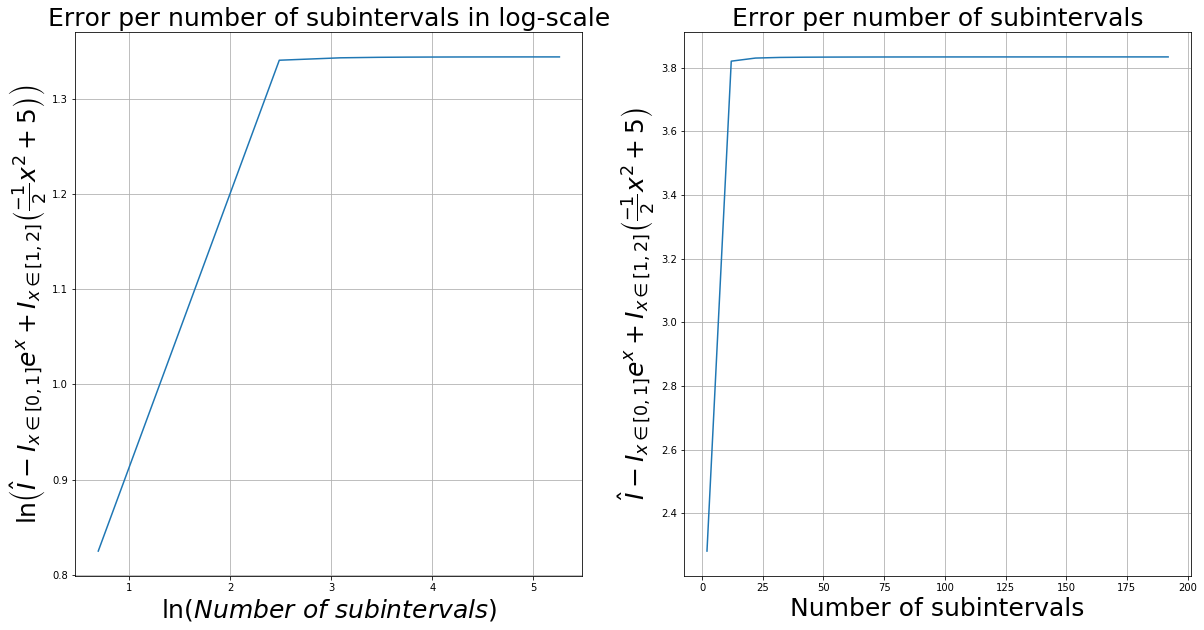

In [101]:
N_results = []
for N in N_:
    x = np.linspace(0, 2, N)
    y = h_vec(x)
    res = integrate_trapezoidal(x, y)
    # print(res)
    N_results.append(np.abs(I - res))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
#ax = f.add_subplot(1,1,1)
N_log = np.log(N_)
N_results_log = np.log(N_results)
ax1.set_title('Error per number of subintervals in log-scale', fontsize=25)
ax1.set_xlabel(r'$\ln(Number \ of \ subintervals)$', fontsize=25)
ax1.set_ylabel(r'$\ln\left(\hat{I} - I_{x\in[0, 1]}e^{x} + I_{x\in[1, 2]}\left(\frac{-1}{2}x^2 + 5\right)\right)$', fontsize=25)
ax1.plot(N_log, N_results_log, label='log-scale')
ax1.grid()
#ax.plot(N_, N_results, label='default')
ax2.set_title('Error per number of subintervals', fontsize=25)
ax2.set_xlabel('Number of subintervals', fontsize=25)
ax2.set_ylabel(r'$\hat{I} - I_{x\in[0, 1]}e^{x} + I_{x\in[1, 2]}\left(\frac{-1}{2}x^2 + 5\right)$', fontsize=25)
ax2.plot(N_, N_results)
ax2.grid()